In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# np.set_printoptions(precision=3, floatmode='fixed')

In [2]:
rng = np.random.RandomState(0)

n_samples, n_features = 50, 301
freqs = np.arange(n_features)
tt = np.zeros(6, 'i')
for j in range(6):
    tt[j] = (j+1) * n_features // 7
T = 10*np.random.random((n_samples,6))
print(tt)

[ 43  86 129 172 215 258]


In [3]:
X = np.zeros((n_samples, n_features))

X += 5*np.exp(-0.005* np.arange(n_features, dtype='d'))

for i in range(n_features):
    X[:, i] += T[:,0]*np.exp( -abs((freqs[i] - tt[0])**2 / 230)) + 0.1 * rng.normal(0, 1, n_samples)
    X[:, i] += T[:,1]*np.exp( -abs((freqs[i] - tt[1])**2 / 200)) + 0.1 * rng.normal(0, 1, n_samples)
    X[:, i] += T[:,2]*np.exp( -abs((freqs[i] - tt[2])**2 / 200)) + 0.1 * rng.normal(0, 1, n_samples)
    X[:, i] += T[:,3]*np.exp( -abs((freqs[i] - tt[3])**2 / 240)) + 0.1 * rng.normal(0, 1, n_samples)
    X[:, i] += T[:,4]*np.exp( -abs((freqs[i] - tt[4])**2 / 200)) + 0.1 * rng.normal(0, 1, n_samples)
    X[:, i] += T[:,5]*np.exp( -abs((freqs[i] - tt[5])**2 / 150)) + 0.1 * rng.normal(0, 1, n_samples)

xs = X[0]

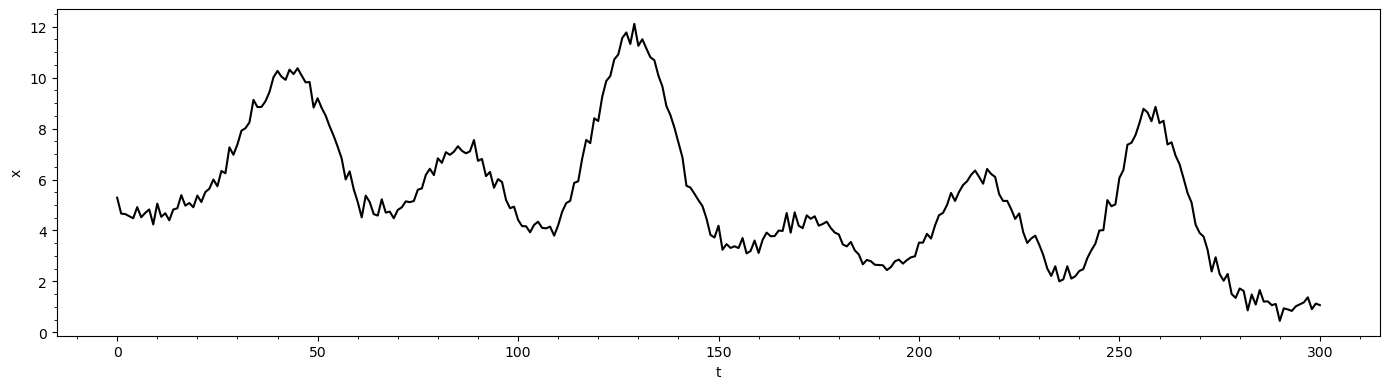

In [4]:
plt.figure(figsize=(14,4))
plt.plot(xs, linewidth=1.5, color='k')
plt.ylabel('x')
plt.xlabel('t')
plt.minorticks_on()
# plt.savefig("fig/test_spectra0.eps")
plt.tight_layout()
plt.show()

In [5]:
import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.avragg as avragg
import mlgrad.array_transform as array_transform
import mlgrad.loss as loss
import mlgrad.regr as regr
import mlgrad.af as af
import mlgrad.smooth as smooth

In [6]:
tau = 100.
# xs_ = np.pad(xs, 10, mode='edge')
zs = smooth.whittaker_smooth(xs, tau2=tau)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


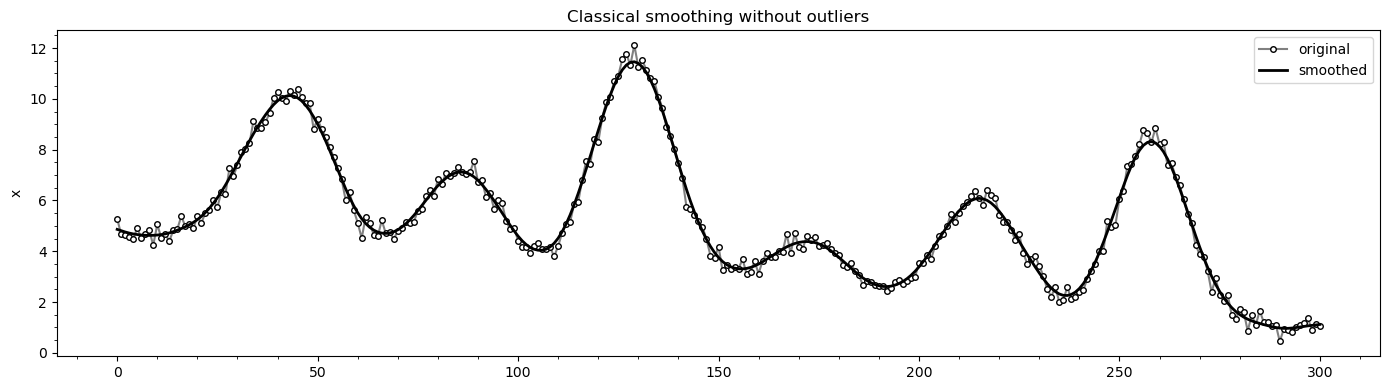

In [7]:
plt.figure(figsize=(14,4))
plt.title("Classical smoothing without outliers")
plt.plot(xs, linewidth=1.5, color='Gray', marker='o', markersize=4, 
         markerfacecolor='w', markeredgecolor='k',label='original')
plt.plot(zs, linewidth=2.0, color='k', label=r'smoothed')
plt.ylabel('x')
# plt.xlabel('t')
plt.minorticks_on()
plt.tight_layout()
plt.legend()
plt.savefig("fig/test_spectra1.eps")
plt.show()

In [8]:
ts_o = np.random.randint(0, n_features, 60)
xs_o = xs.copy()
for t in ts_o:
    xs_o[t] += 5.

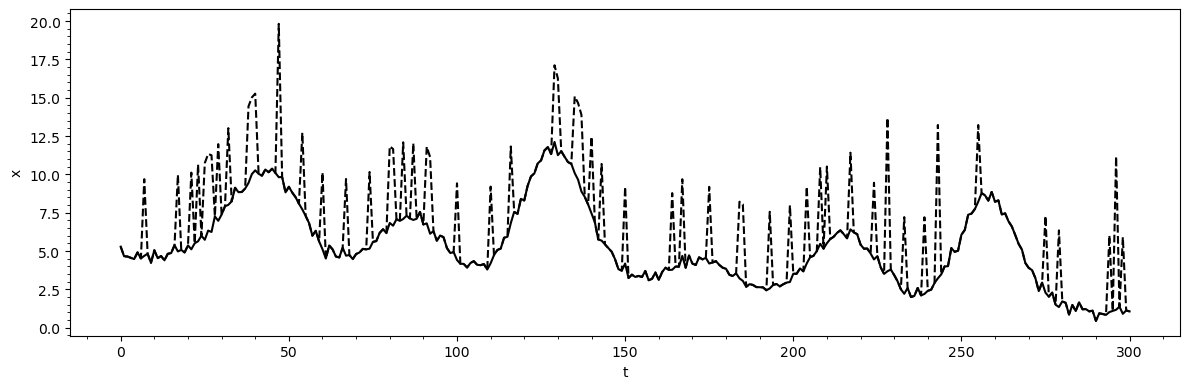

In [9]:
plt.figure(figsize=(12,4))
plt.plot(xs_o, linewidth=1.5, linestyle='--', color='k')
plt.plot(xs, linewidth=1.5, color='k')
plt.ylabel('x')
plt.xlabel('t')
plt.minorticks_on()
plt.savefig("fig/test_spectra0.eps")
plt.tight_layout()
plt.show()

In [10]:
zs_o = smooth.whittaker_smooth(xs_o, tau2=tau)

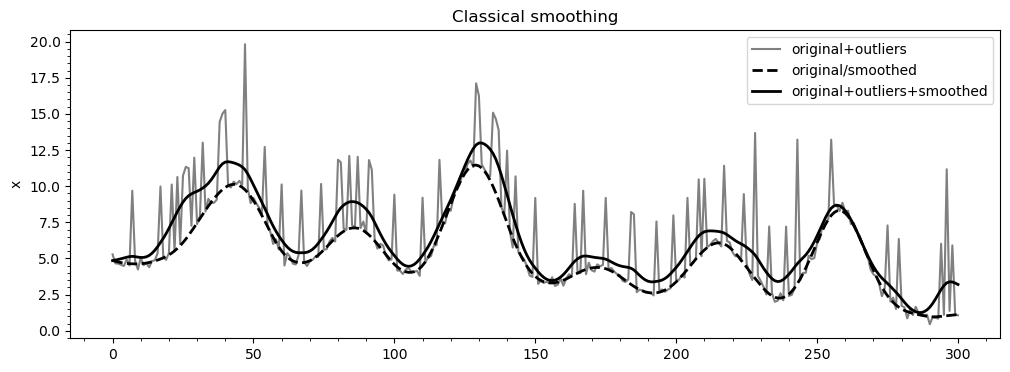

In [11]:
plt.figure(figsize=(12,4))
plt.title("Classical smoothing")
plt.plot(xs_o, linewidth=1.5, color='Gray', label='original+outliers')
plt.plot(zs, linewidth=2.0, color='k', linestyle='--', label='original/smoothed')
plt.plot(zs_o, linewidth=2.0, color='k', label='original+outliers+smoothed')
plt.ylabel('x')
# plt.xlabel('t')
plt.minorticks_on()
plt.legend()
plt.show()

In [12]:
zs_r, _ = smooth.whittaker_smooth_ex(
                xs_o,
                aggfunc=avragg.RArithMean(funcs.LogSquare()),  
                tau2=tau)

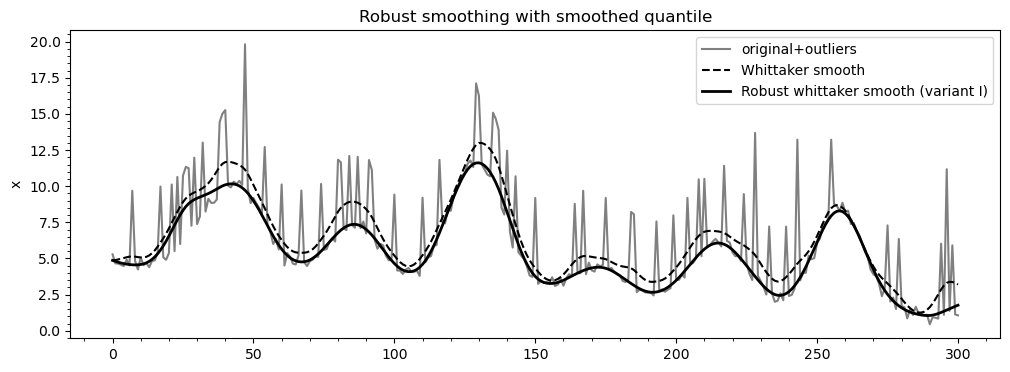

In [13]:
plt.figure(figsize=(12,4))
plt.title("Robust smoothing with smoothed quantile")
plt.plot(xs_o, linewidth=1.5, color='Gray', label='original+outliers')
plt.plot(zs_o, linewidth=1.5, color='k', linestyle='--', label='Whittaker smooth')
plt.plot(zs_r, linewidth=2.0, color='k', label=r'Robust whittaker smooth (variant I)')
plt.ylabel('x')
# plt.xlabel('t')
plt.minorticks_on()
plt.legend()
plt.show()

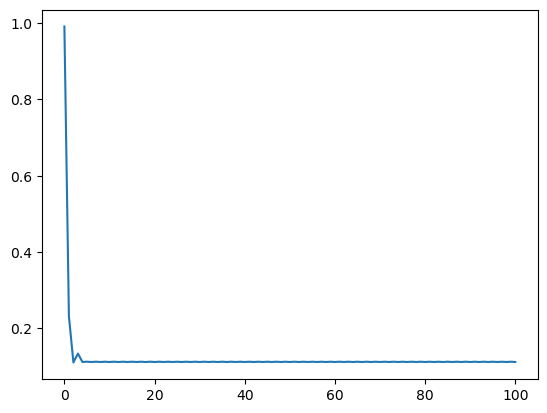

In [21]:
zs2, d = smooth.whittaker_smooth_ex(
                xs_o,
                aggfunc=af.averaging_function("WM", 
                        funcs.QuantileFunc(0.80, funcs.SoftAbs_Sqrt(0.001))),  
                        tau2=tau)
plt.plot(d["qvals"])
plt.show()

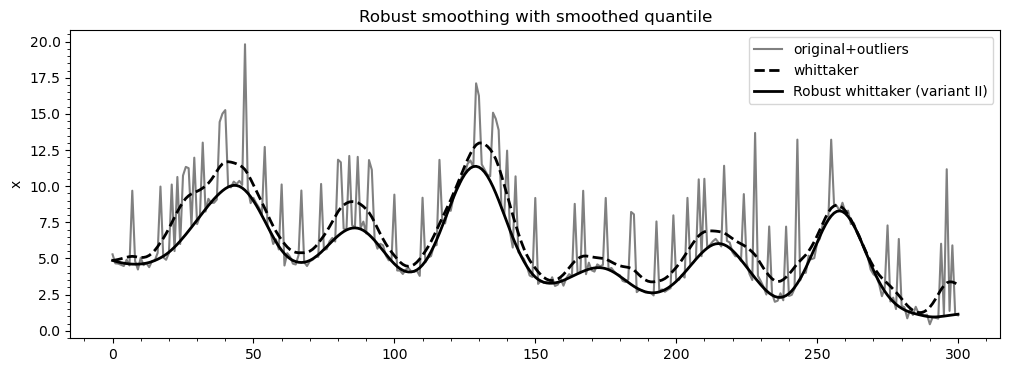

In [22]:
plt.figure(figsize=(12,4))
plt.title("Robust smoothing with smoothed quantile")
plt.plot(xs_o, linewidth=1.5, color='Gray', label='original+outliers')
plt.plot(zs_o, linewidth=2.0, color='k', linestyle='--', label='whittaker')
plt.plot(zs2, linewidth=2.0, color='k', label=r'Robust whittaker (variant II)')
plt.ylabel('x')
# plt.xlabel('t')
plt.minorticks_on()
plt.legend()
plt.show()

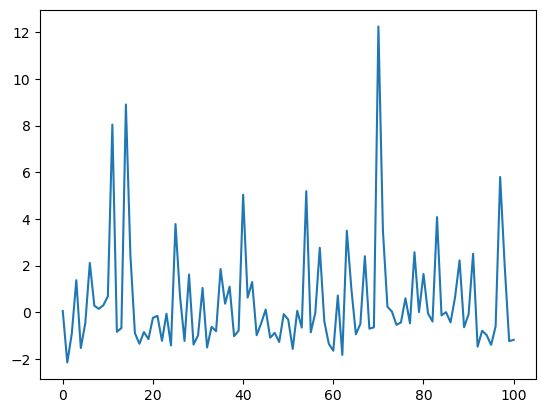

In [23]:
alpha = 3.5
zs3, d = smooth.whittaker_smooth_ex(
                xs_o,
                aggfunc=af.averaging_function("WMZ", kwds={"alpha":alpha}),  
                tau2=tau)
plt.plot(np.log(d["qvals"]))
plt.show()

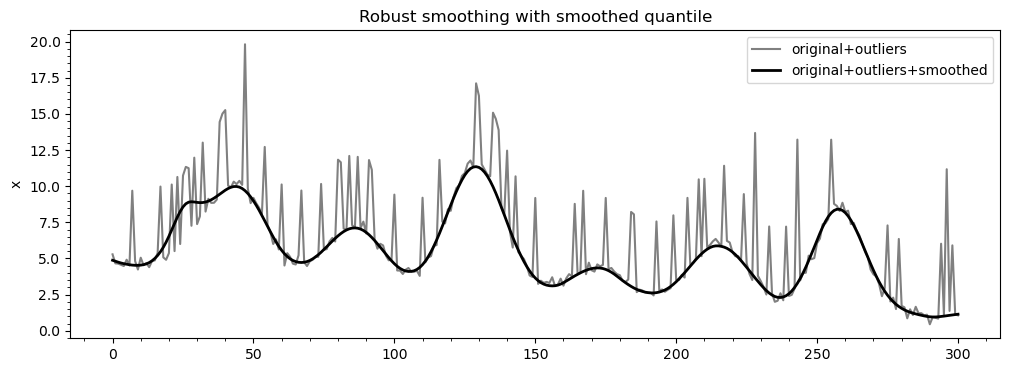

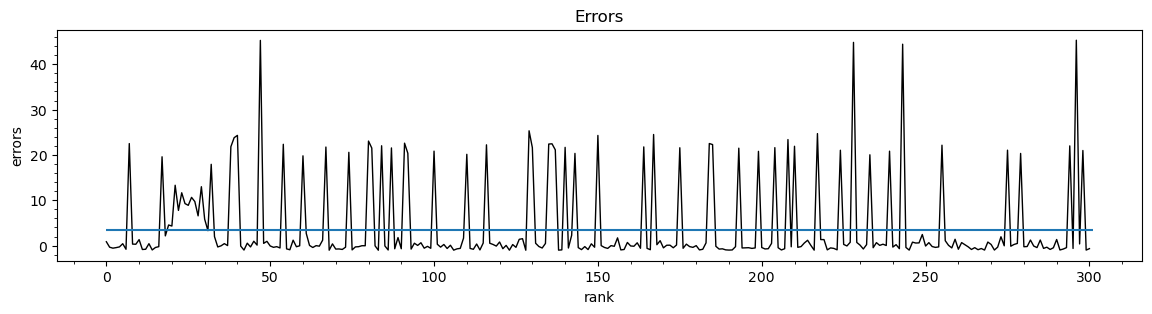

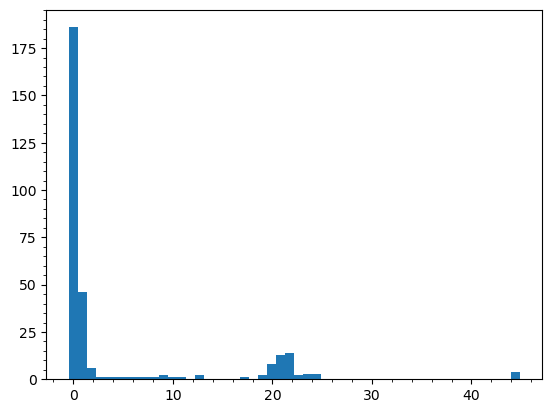

In [17]:
plt.figure(figsize=(12,4))
plt.title("Robust smoothing with smoothed quantile")
plt.plot(xs_o, linewidth=1.5, color='Gray', label='original+outliers')
# plt.plot(zs, linewidth=2.0, color='k', linestyle='--', label='original/smoothed')
plt.plot(zs3, linewidth=2.0, color='k', label=r'original+outliers+smoothed')
plt.ylabel('x')
# plt.xlabel('t')
plt.minorticks_on()
plt.legend()
plt.show()

plt.figure(figsize=(14,3))
plt.title("Errors")
err = abs(xs_o-zs3)
ZS = array_transform.array_modified_zscore(err)
plt.plot(ZS, linewidth=1.0, color='k')
plt.hlines(alpha, 0, len(zs))
plt.ylabel('errors')
plt.xlabel('rank')
plt.minorticks_on()
plt.show()

plt.hist(abs(ZS), bins=50, align='left')
plt.minorticks_on()
plt.show()

In [18]:
xs1_o = xs_o.copy()
np.putmask(xs1_o, abs(ZS) >= alpha, zs3)
zs4 = smooth.whittaker_smooth(xs1_o, tau2=tau)

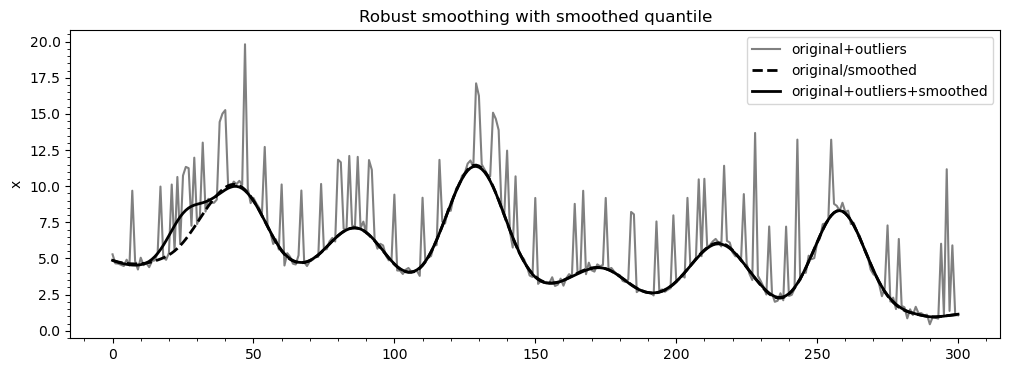

In [19]:
plt.figure(figsize=(12,4))
plt.title("Robust smoothing with smoothed quantile")
plt.plot(xs_o, linewidth=1.5, color='Gray', label='original+outliers')
plt.plot(zs, linewidth=2.0, color='k', linestyle='--', label='original/smoothed')
plt.plot(zs4, linewidth=2.0, color='k', label=r'original+outliers+smoothed')
plt.ylabel('x')
# plt.xlabel('t')
plt.minorticks_on()
plt.legend()
plt.show()
